## OIL DATA ANALYTICS PROJECT

#### SETUP

In [1]:
# Download R libraries for analysis
library(xts)
library(dplyr)
library(ggplot2)
library(quantmod)
library(lubridate)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘dplyr’


The following objects are masked from ‘package:xts’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Download R libraries for Visualization
# install.packages("highcharter")
# install.packages("forecast")
library(highcharter)
library(forecast)

In [3]:
# Connect to Quandl library
library(Quandl)
my_api <- "xq44Ss4a-fZGqgecyG1o"
Quandl.api_key(my_api)

#### Oil Futures Data Exploration

In [4]:
#  Get Historical Futures Prices: Crude Oil Futures from Quandl
CME_CL_Data <- Quandl('CHRIS/CME_CL1')

# Show the first 10 rows of the CME_CL_Data
head(CME_CL_Data, n=10)

Date       Open  High  Low   Last  Change Settle Volume
1  2020-10-09 41.31 41.47 40.38 40.52 -0.59  40.60  328091
2  2020-10-08 39.99 41.33 39.76 41.27  1.24  41.19  404101
3  2020-10-07 39.83 40.35 39.28 40.04 -0.72  39.95  427198
4  2020-10-06 39.35 40.86 39.10 39.83  1.45  40.67  393993
5  2020-10-05 37.00 39.72 37.00 39.35  2.17  39.22  371910
6  2020-10-02 38.60 38.65 36.63 36.99 -1.67  37.05  384067
7  2020-10-01 39.90 40.47 37.61 38.58 -1.50  38.72  435337
8  2020-09-30 39.16 40.37 38.68 39.86  0.93  40.22  354437
9  2020-09-29 40.58 40.70 38.41 39.11 -1.31  39.29  392396
10 2020-09-28 40.07 40.80 39.78 40.57  0.35  40.60  221523
   Previous Day Open Interest
1  233004                    
2  268430                    
3  306975                    
4  324206                    
5  335875                    
6  345967                    
7  350342                    
8  355971                    
9  355663                    
10 355229

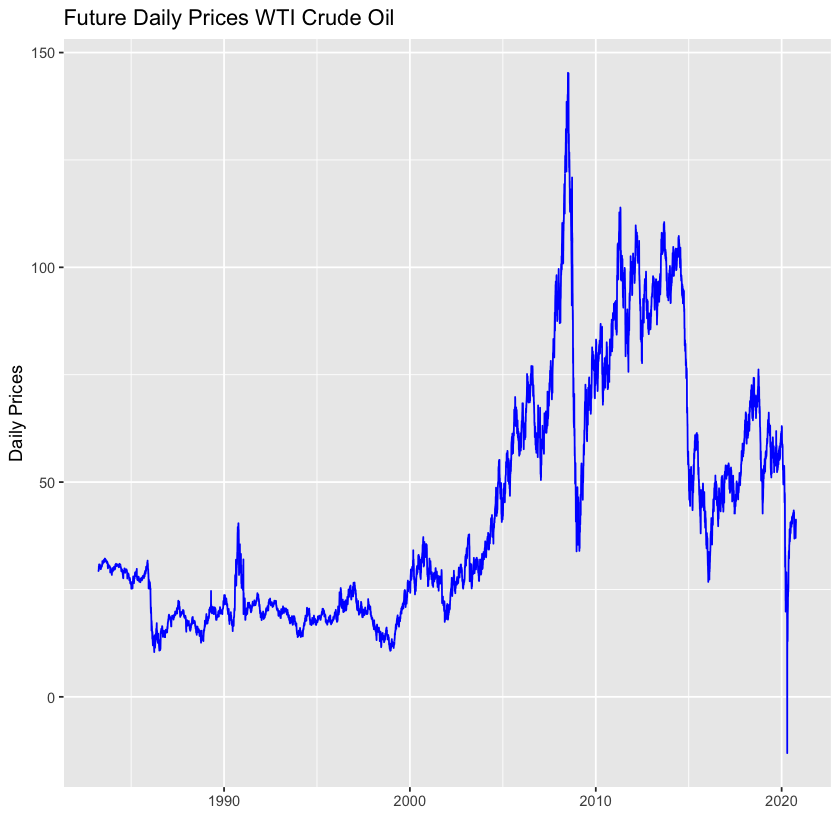

In [5]:
# Plot the last price field of the Crude Oil Futures Historical Prices
ggplot(CME_CL_Data, aes(Date, Last)) + geom_line(color = "blue") + xlab("") + ylab("Daily Prices")+   ggtitle("Future Daily Prices WTI Crude Oil") 

In [6]:
# Inverse the order of CME_CL_Data dataframe to have the oldest data at first and the latest data at the bottom. 
# We would use the arrange command from dplyr to achieve this. The data frame CME_CL_Data_ starts from 
# the oldest data of the CL future continuous series from Quandl
 
CME_CL_Data_ <- CME_CL_Data %>% arrange(rev(rownames(.)))
 
# It seems that dates are not consecutive. This issue was observed when we reverse 
# the series and is present most at the beginning of the series. So, sometimes
# we have nonconsecutive dates in subsequent rows. To avoid this, we will sort
# the CME_CL_DATA_ by consecutive dates. The command arrange from dplyr would # do this task.


CME_CL_Data_ <- CME_CL_Data_ %>%
  mutate(date = as.Date(Date, "%d-%m-%Y")) %>%
  arrange(date)
 
# Calculate the returns  
CME_CL_Data_$returns <- as.numeric(c('NA',diff(log(CME_CL_Data_$Last))))

# Remove outliers from the CME_CL_DATA_ , that are values with daily returns greater than 0.3

CME_CL_Data_ <- CME_CL_Data_[!abs(CME_CL_Data_$returns) > 0.3,]

# Select only numeric columns from the CME_CL_Data_ dataframe in order to summarize   the numeric columns. This can be done with the select_if command from dplyr package

CL_DATA <- select_if(CME_CL_Data_, is.numeric)

# Get the number of NAN values by column
na_cols_count <-sapply(CL_DATA, function(y) sum(length(which(is.na(y)))))
 
# The Change column has a lot of null values. So we would 
# separate this column from the others. Using the select command from dplyr 
# package we can do this task. The c() vector contain the columns position that we want to keep.

CL_DATA <- select(CL_DATA,c(1,2,3,4,6,7,8,9))

# Remove rows with Nan values using complete.cases command
CL_DATA <- CL_DATA[complete.cases(CL_DATA),]

# The statistic function will calculate some metrics such as mean, standard deviation, median, max and min for each of the columns. 

statistics <- do.call(data.frame, 
                      list(mean = round(apply(CL_DATA, 2, mean),4),
                           sd = round(apply(CL_DATA, 2, sd),4),
                           median = round(apply(CL_DATA, 2, median),4),
                           min = round(apply(CL_DATA, 2, min),4),
                         max = round(apply(CL_DATA, 2, max),4)))
statistics

Warning message in log(CME_CL_Data_$Last):
“NaNs produced”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


mean        sd          median     min   
Open                           43.0797     28.1718    30.3500 10.000
High                           43.6694     28.5270    30.6200 11.020
Low                            42.4594     27.7680    30.1000  9.750
Last                           43.0823     28.1644    30.3600 10.420
Settle                         43.0813     28.1650    30.3600 10.420
Volume                     166157.7429 202963.3358 69877.5000  0.000
Previous Day Open Interest 152610.9244 138860.8802 98129.5000  0.000
returns                         0.0001      0.0247     0.0004 -0.285
                           max        
Open                           145.190
High                           147.270
Low                            143.220
Last                           145.290
Settle                         145.290
Volume                     1389653.000
Previous Day Open Interest  642793.000
returns                          0.218

#### Exploring Oil Prices Data: WTI, BRENT, ARAB LIGHT

In [139]:
# WTI monthly data
WTI <- Quandl("FRED/DCOILWTICO", 
                    type = "xts", collapse = "monthly",  
                    start_date = "1990-01-01", end_date = "2020-06-01")
# index(WTI) <- seq(mdy('01/01/1990'), mdy(last(index(WTI))), by = 'months')

In [140]:
# BRENT monthly data
BRENT <- Quandl("FRED/DCOILBRENTEU", 
                    type = "xts", collapse = "monthly",  
                    start_date = "1990-01-01", end_date = "2020-06-01")

In [141]:
# ARAB LIGHT monthly data
ARAB_LIGHT <- Quandl("EIA/PET_ISA4990008_M", 
                    type = "xts", start_date = "1990-01-01", 
                    end_date = "2020-06-01")

In [301]:
# Merge Data
oil_data <- merge(WTI,BRENT, ARAB_LIGHT, all=TRUE)
head(oil_data)

           WTI BRENT ARAB_LIGHT
Jan 1990 22.69 20.50      19.73
Feb 1990 21.55 19.20      18.71
Mar 1990 20.34 17.95      16.76
Apr 1990 18.50 16.35      14.86
May 1990 17.47 15.30      14.72
Jun 1990 17.05 15.73      15.48

In [302]:
# Test for missing values
colSums(is.na(oil_data))
na_index_list <- which(is.na(oil_data))
na_index_list

WTI      BRENT ARAB_LIGHT 
         0          0          8

[1] 1064 1066 1084 1085 1086 1087 1089 1098

In [303]:
# Filling missing values
count = 1
for ( i in oil_data$ARAB_LIGHT) {
    if (is.na(i)== TRUE) {
        oil_data$ARAB_LIGHT[count] <-oil_data$ARAB_LIGHT[count-1]
    }
    count = count +1
    }
tail(oil_data$ARAB_LIGHT)

         ARAB_LIGHT
Jan 2020      51.55
Feb 2020      52.48
Mar 2020      24.14
Apr 2020      22.30
May 2020      31.84
Jun 2020      31.84

In [102]:
# Save data to json file
# library(jsonlite)
# exportJSON <- toJSON(oil_data_ts) write(exportJSON, "oil_prices.json")

In [103]:
# Create statistics summary
oil_statistics <- do.call(data.frame, 
                      list(mean = round(apply(oil_data, 2, mean),4),
                           sd = round(apply(oil_data, 2, sd),4),
                           median = round(apply(oil_data, 2, median),4),
                           min = round(apply(oil_data, 2, min),4),
                         max = round(apply(oil_data, 2, max),4)))
oil_statistics

mean    sd      median min   max   
WTI        47.7773 29.2695 40.985 11.37 139.96
BRENT      49.0725 32.8100 40.090  9.91 138.40
ARAB_LIGHT 47.7572 31.8994 38.545  9.68 129.66

In [100]:
index(oil_data) <- seq(mdy('01/01/1990'), mdy(last(index(oil_data))), by = 'months')
hchart(oil_data)

HTML widgets cannot be represented in plain text (need html)

In [11]:
# WTI monthly data
wti_zoo <- Quandl("FRED/DCOILWTICO", 
                    type = "zoo", 
                    collapse = "monthly",  
                    start_date = "1990-01-01", 
                    end_date = "2020-09-01")
# index(WTI) <- seq(mdy('01/01/1990'), mdy(last(index(WTI))), by = 'months')
str(wti_zoo)
wti_ts <- as.ts(wti_zoo)
# head(wti_ts)
is.ts(wti_ts)

‘zooreg’ series from Jan 1990 to Sep 2020
  Data: num [1:369] 22.7 21.6 20.3 18.5 17.5 ...
  Index:  'yearmon' num [1:369] Jan 1990 Feb 1990 Mar 1990 Apr 1990 ...
  Frequency: 12 


[1] TRUE

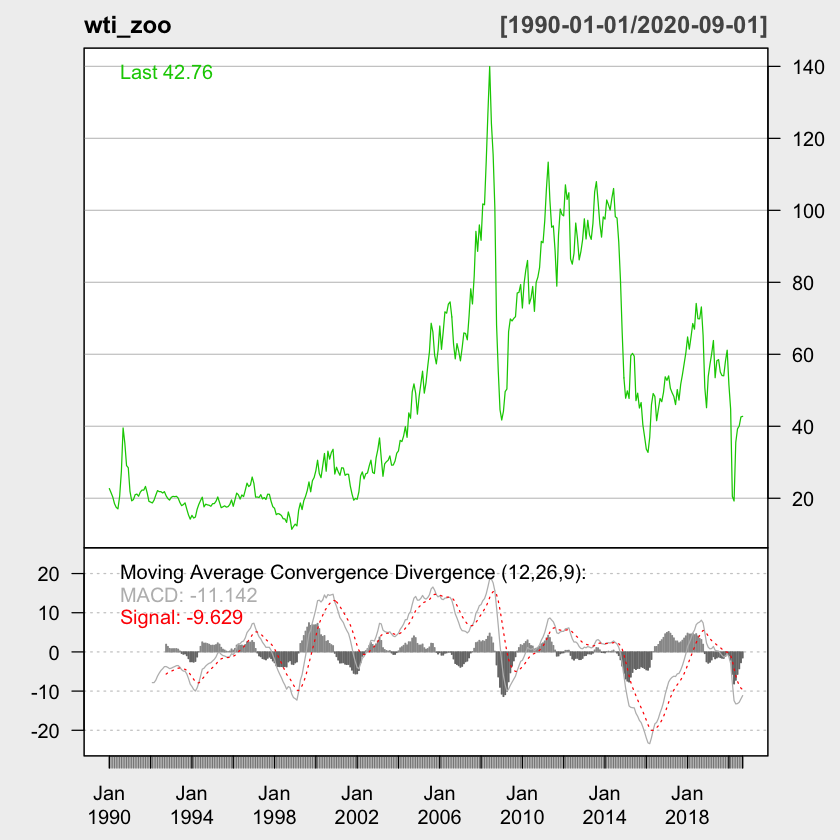

In [12]:
chartSeries(wti_zoo, theme="white", TA=c(addMACD(),addVo()))

mean    sd      median min   max   
WTI        47.7773 29.2695 40.985 11.37 139.96
BRENT      49.0725 32.8100 40.090  9.91 138.40
ARAB_LIGHT 47.7572 31.8994 38.545  9.68 129.66

In [33]:
str(oil_data)
tail(oil_data)

An ‘xts’ object on 1990-01-01/2020-06-01 containing:
  Data: num [1:366, 1:3] 22.7 21.6 20.3 18.5 17.5 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "WTI" "BRENT" "ARAB_LIGHT"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


             WTI BRENT ARAB_LIGHT
2020-01-01 51.58 57.77      51.55
2020-02-01 44.83 51.31      52.48
2020-03-01 20.51 14.85      24.14
2020-04-01 19.23 18.11      22.30
2020-05-01 35.57 34.15      31.84
2020-06-01 35.49 36.74         NA

#### Time-Series Analysis in R

In [109]:
# Convert XTS to Time Series
str(oil_data)
oil_data_ts <- ts(oil_data, start = c(1990,1,1), frequency = 12)
head(oil_data_ts)
str(oil_data_ts)
is.ts(oil_data_ts)

An ‘xts’ object on 1990-01-01/2020-06-01 containing:
  Data: num [1:366, 1:3] 22.7 21.6 20.3 18.5 17.5 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "WTI" "BRENT" "ARAB_LIGHT"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


WTI   BRENT ARAB_LIGHT
Jan 1990 22.69 20.50 19.73     
Feb 1990 21.55 19.20 18.71     
Mar 1990 20.34 17.95 16.76     
Apr 1990 18.50 16.35 14.86     
May 1990 17.47 15.30 14.72     
Jun 1990 17.05 15.73 15.48

 Time-Series [1:366, 1:3] from 1990 to 2020: 22.7 21.6 20.3 18.5 17.5 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "WTI" "BRENT" "ARAB_LIGHT"
 - attr(*, "index")= num [1:366] 6.31e+08 6.34e+08 6.36e+08 6.39e+08 6.42e+08 ...
  ..- attr(*, "tclass")= chr "Date"
  ..- attr(*, "tzone")= chr "UTC"


[1] TRUE

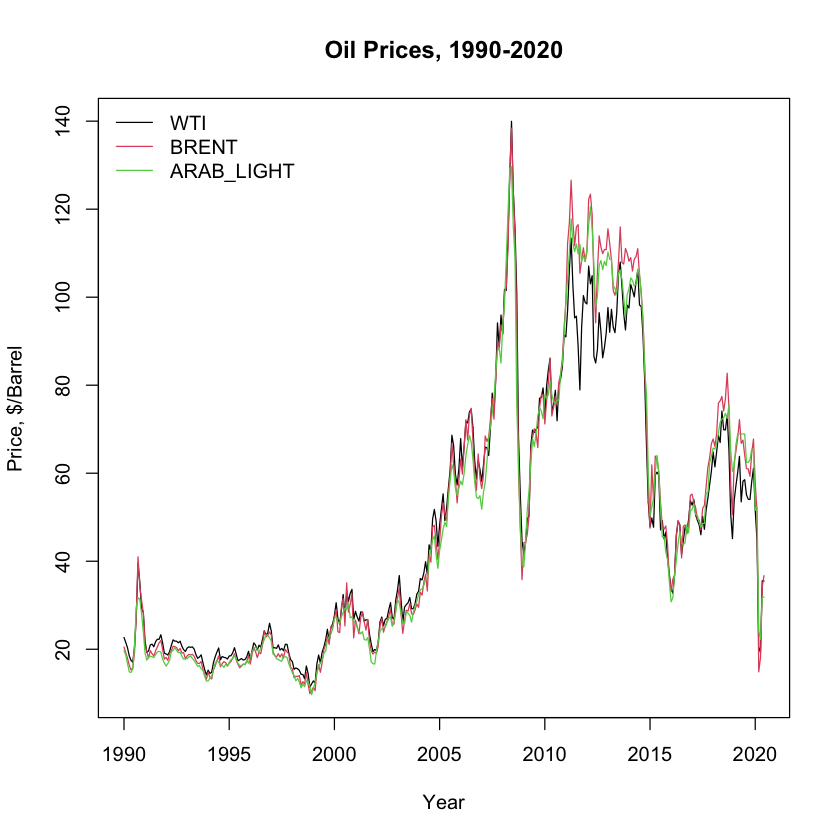

In [110]:
# Use ts.plot with eu_stocks
ts.plot(oil_data_ts, col = 1:3, xlab = "Year", ylab = "Price, $/Barrel", main = "Oil Prices, 1990-2020")

# Add a legend to your ts.plot
legend("topleft", colnames(oil_data_ts), lty = 1, col = 1:3, bty = "n")


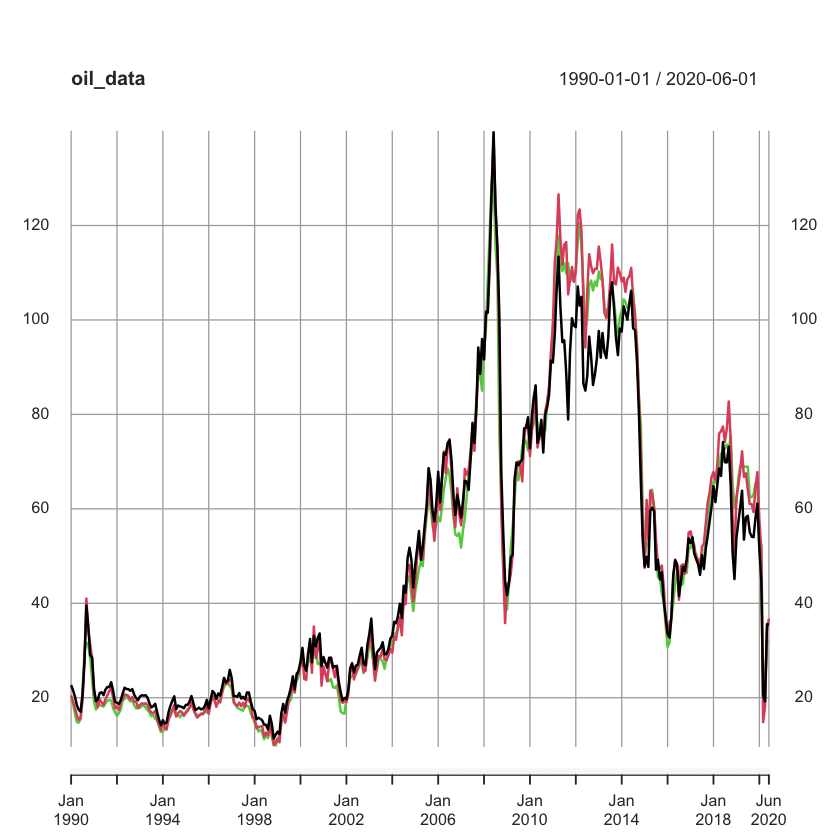

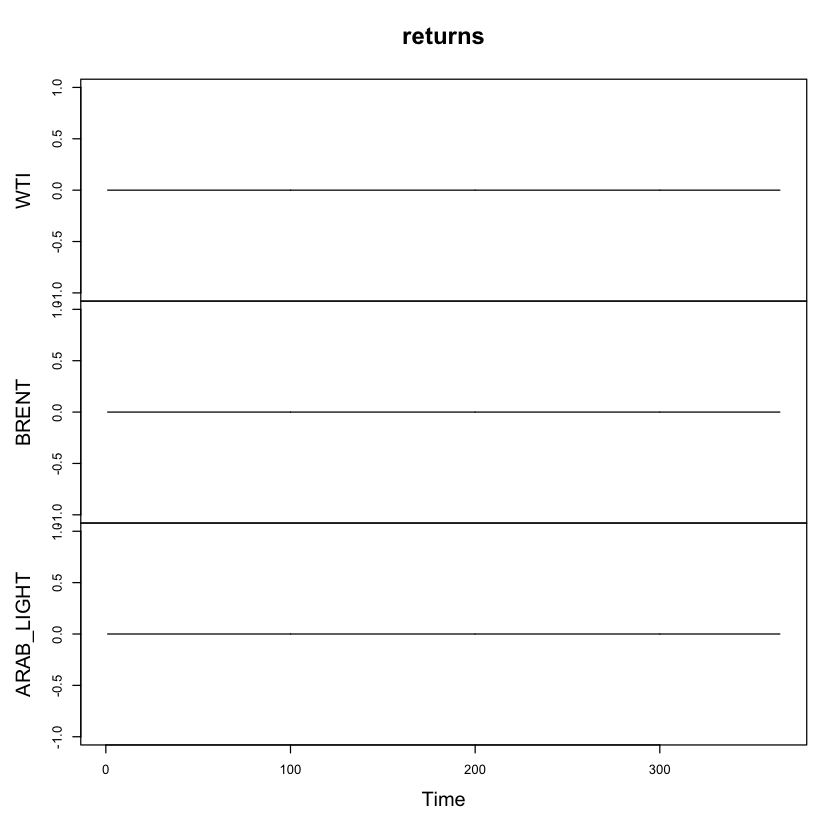

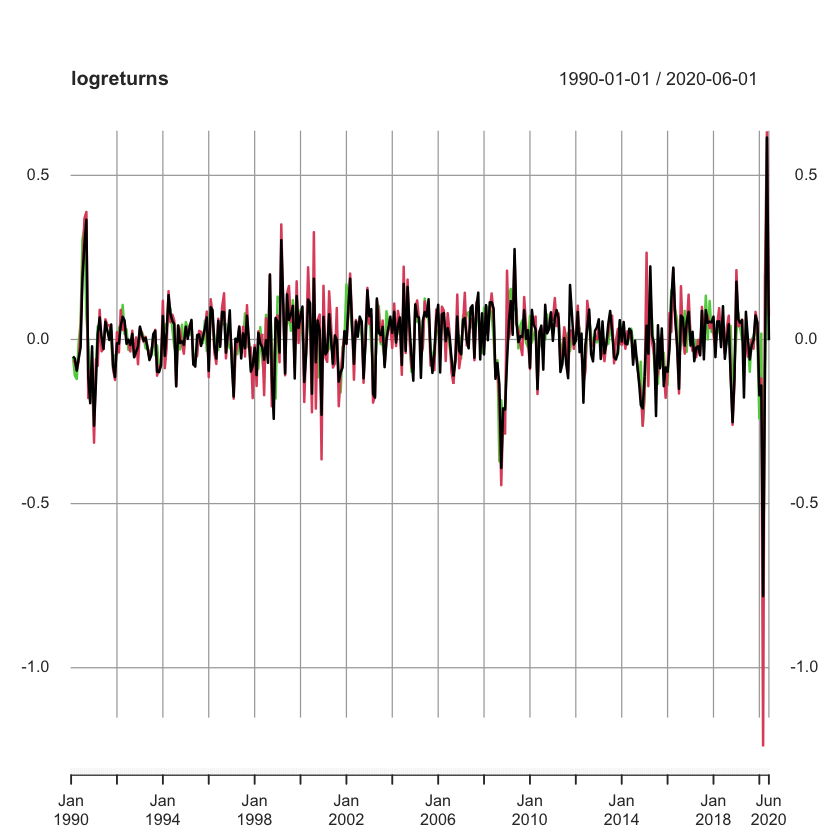

In [111]:
# Plot oil data
plot(oil_data)

# Use this code to convert prices to returns
returns <- oil_data[-1,] / oil_data[-369,]-1

# Convert returns to ts
returns <- ts(returns)

# Plot returns
plot(returns)

# Use this code to convert prices to log returns
logreturns <- diff(log(oil_data))

# Plot logreturns
plot(logreturns)


In [112]:
# Create Time Series Objects per each Oil Type
wti_ts <- as.ts(oil_data$WTI)
brent_ts <- as.ts(oil_data$BRENT)
arab_light_ts <- as.ts(oil_data$ARAB_LIGHT)

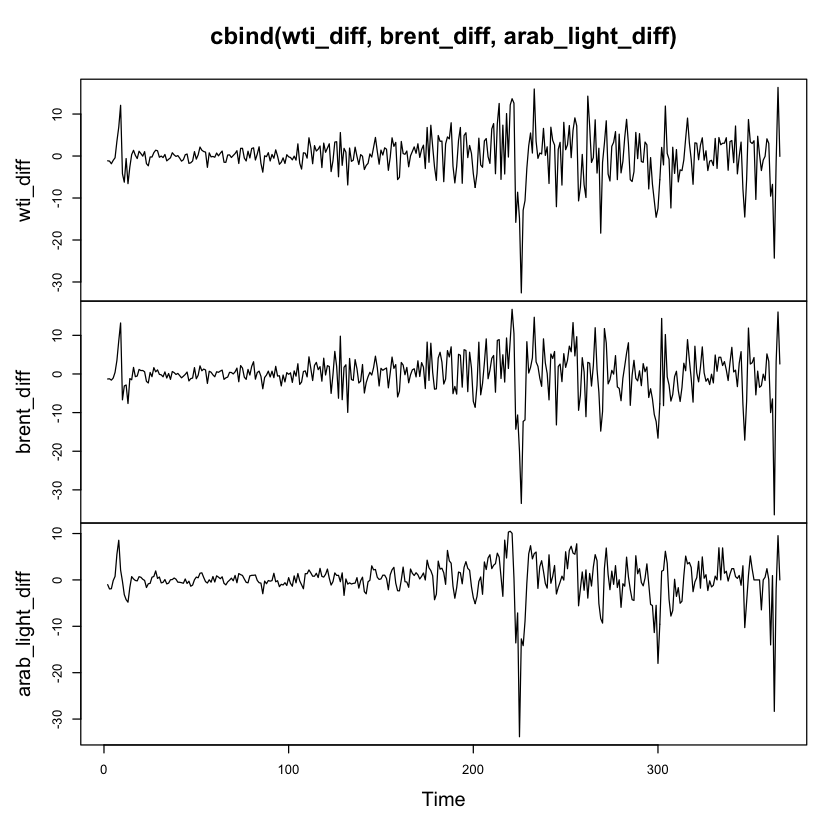

In [113]:
# Generate the first difference of oil_data_ts
wti_diff <- diff(wti_ts)
brent_diff <- diff(brent_ts)
arab_light_diff <- diff(arab_light_ts)
  
# Plot
plot.ts(cbind(wti_diff,brent_diff, arab_light_diff))

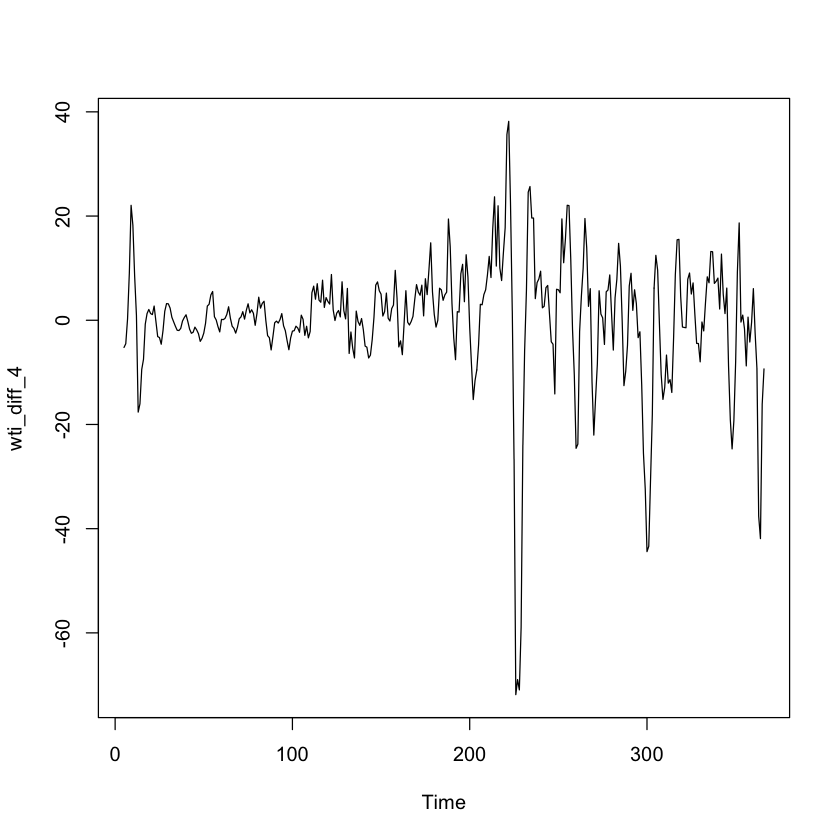

In [114]:
# Generate a diff of x with lag = 4. Save this to dx
wti_diff_4 <- diff(wti_ts, lag = 4)

# Plot dz
par(mfrow=c(1,1))
ts.plot(wti_diff_4)


#### Stationary process (White Noise Model)

In [115]:
# Fit the WN model to oil data using the arima command
arima(wti_ts, order = c(0, 0, 0))

# Calculate the sample mean and sample variance of y
mean(wti_ts)
var(wti_ts)


Call:
arima(x = wti_ts, order = c(0, 0, 0))

Coefficients:
      intercept
        47.7773
s.e.     1.5279

sigma^2 estimated as 854.4:  log likelihood = -1754.65,  aic = 3513.29

[1] 47.77732

[1] 856.7065

* From the comparisons we can see that the arima() function estimates are very close to the sample mean and variance estimates, in fact identical for the mean.

#### Non Stationary process (Random Walk Model)

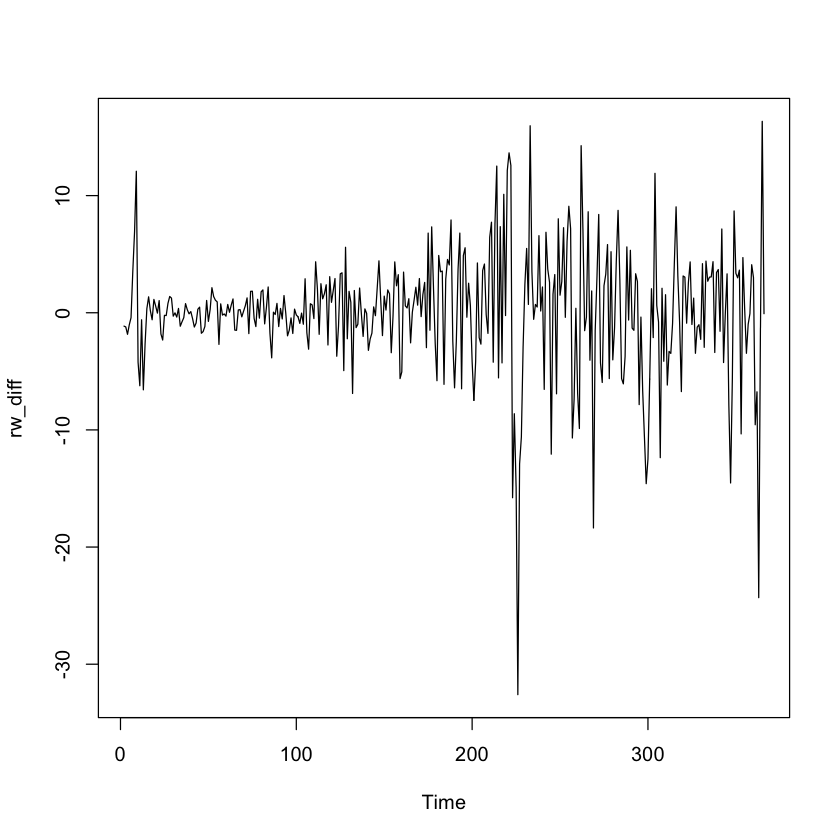

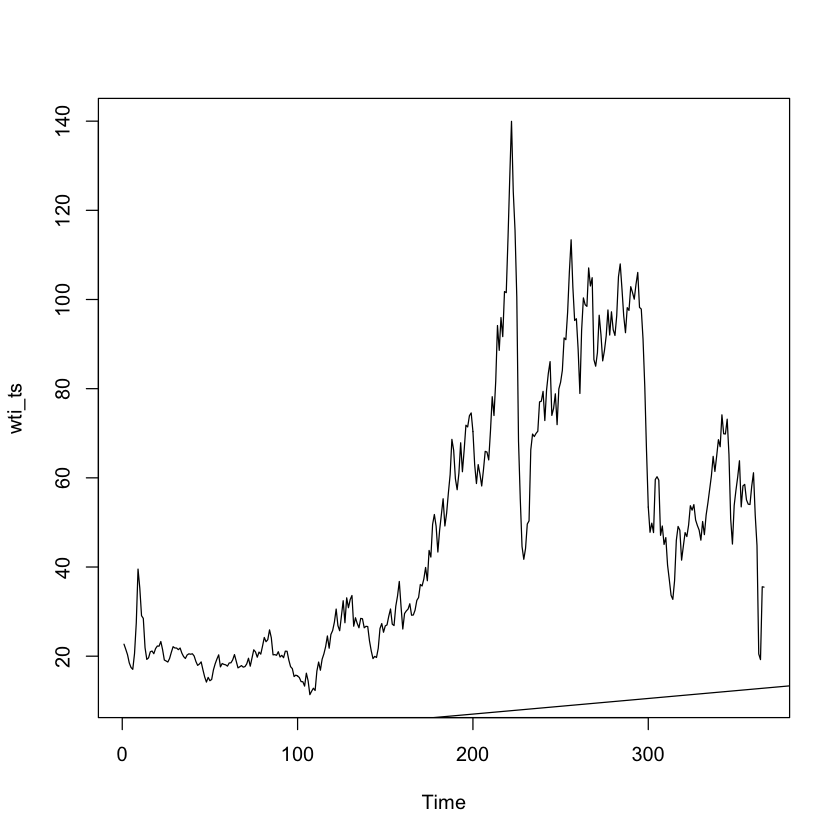

In [116]:
# Difference your random_walk data
rw_diff <- diff(wti_ts) 

# Plot rw_diff
ts.plot(rw_diff)

# Now fit the WN model to the differenced data
model_wn <- arima(rw_diff, order = c(0, 0, 0))

# Store the value of the estimated time trend (intercept)
int_wn <- model_wn$coef

# Plot the original random_walk data
ts.plot(wti_ts)

# Use abline(0, ...) to add time trend to the figure
abline(0,int_wn)

* The arima() command correctly identified the time trend in our original oil data.

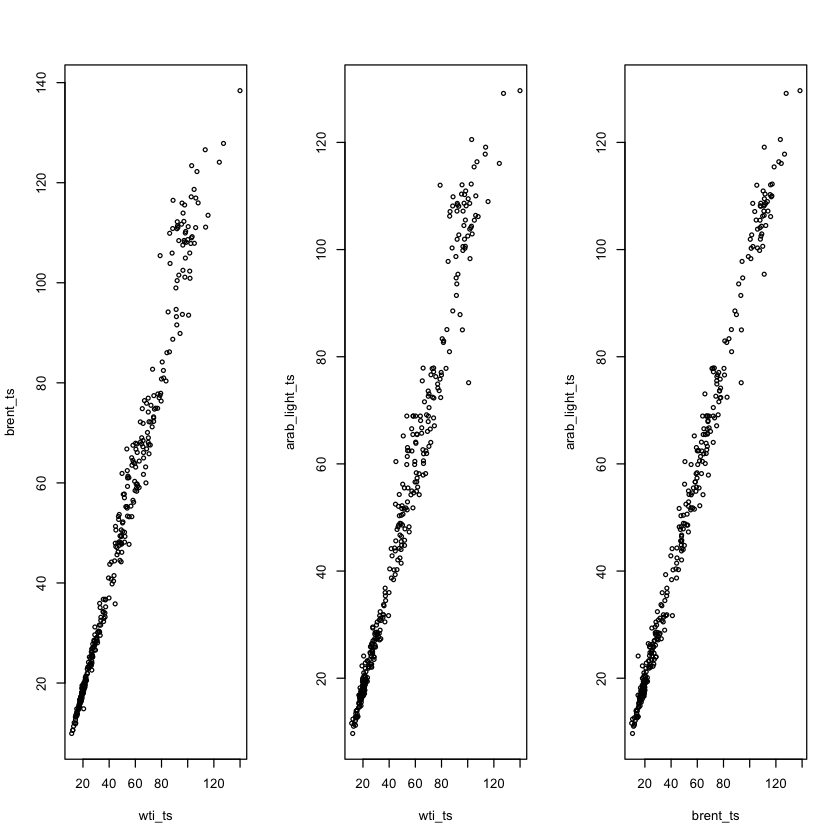

In [117]:
par(mfrow=c(1,3))
plot(wti_ts, brent_ts)
plot(wti_ts, arab_light_ts)
plot(brent_ts, arab_light_ts)

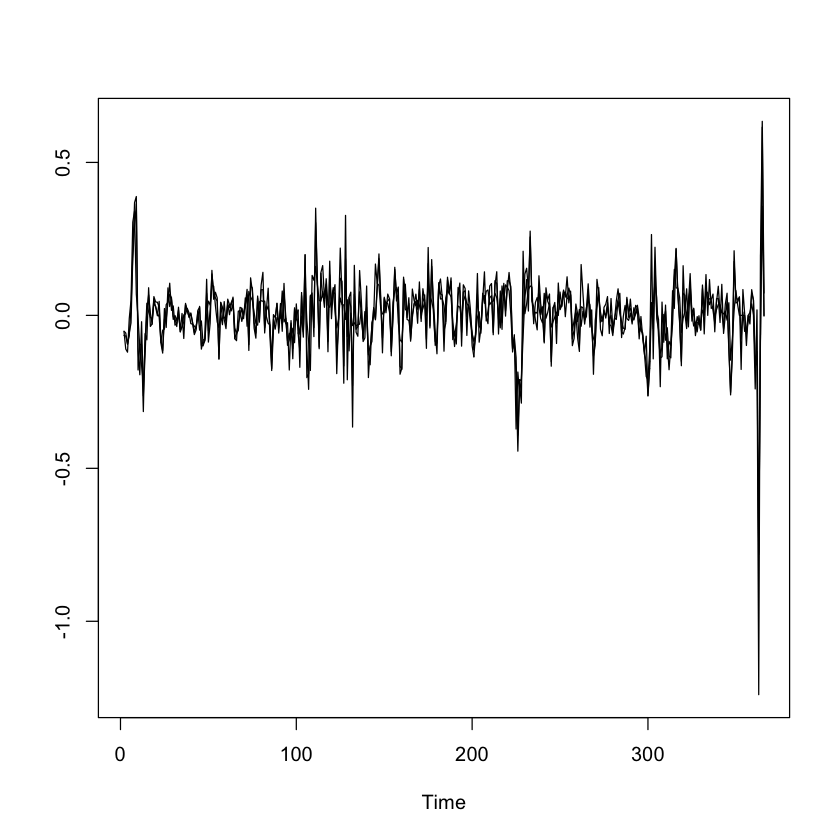

In [118]:
wti_log_return <- diff(log(wti_ts))
brent_log_return <- diff(log(brent_ts))
arab_light_log_return <- diff(log(arab_light_ts))
ts.plot(cbind(wti_log_return, brent_log_return, arab_light_log_return))

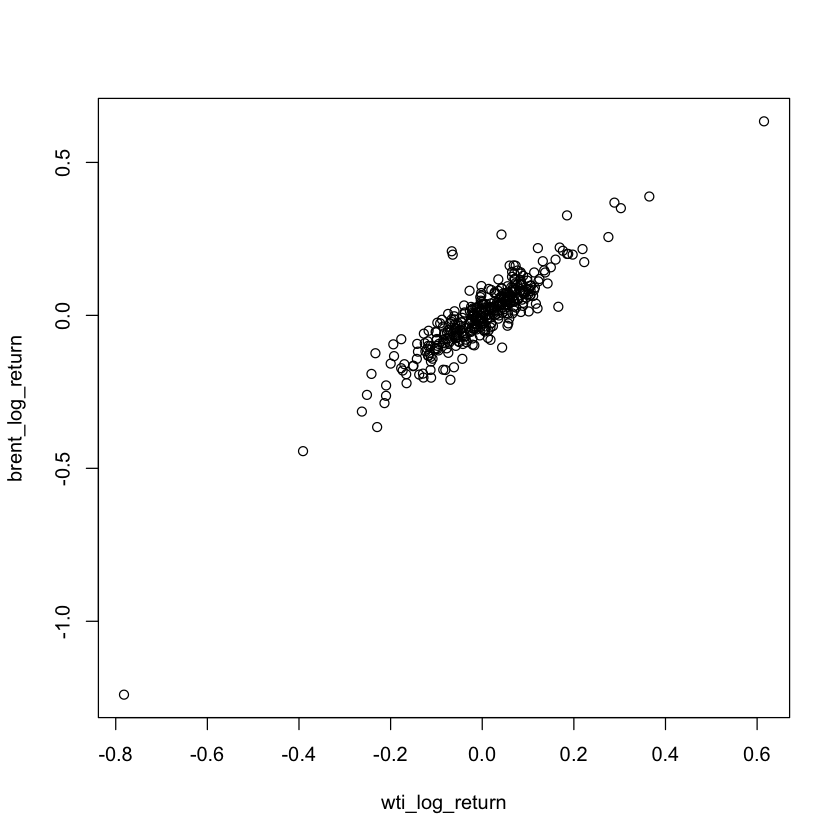

In [119]:
plot(wti_log_return, brent_log_return)

In [120]:
# Fit an arima model to our time series using the auto.arima() function from the forecast package
auto.arima(oil_data$WTI)

Series: oil_data$WTI 
ARIMA(2,1,2) 

Coefficients:
         ar1      ar2      ma1     ma2
      1.4608  -0.5760  -1.2660  0.3481
s.e.  0.1432   0.1504   0.1623  0.1706

sigma^2 estimated as 25.83:  log likelihood=-1109.46
AIC=2228.91   AICc=2229.08   BIC=2248.41

In [121]:
# WTI last monthly data
wti_data <- Quandl("FRED/DCOILWTICO", 
                    type = "xts", 
                    collapse = "monthly",  
                    start_date = "1990-01-01", 
                    end_date = "2020-10-01")
wti_2020 <- wti_data['2020',]
wti_2020[6:10]

          [,1]
Jun 2020 39.27
Jul 2020 40.10
Aug 2020 42.61
Sep 2020 40.05
Oct 2020 38.51

In [122]:
# Predict what WTI oil prices will look like over the next six months, based on the arima model we just fit
# Forecasting period June-December 2020
wti_forecast = auto.arima(oil_data$WTI) %>% forecast(h = 5)
wti_forecast

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
367       38.14928 31.63542 44.66315 28.18719 48.11138
368       40.29697 30.14768 50.44625 24.77498 55.81896
369       41.90258 28.88434 54.92082 21.99290 61.81227
370       43.01101 27.75129 58.27073 19.67328 66.34874
371       43.70537 26.71575 60.69500 17.72198 69.68876

In [123]:
auto.arima(oil_data$WTI) %>% 
  forecast(h = 6) %>% 
  hchart() %>% 
  hc_title(text = "WTI oil historical and forecast") %>% 
  hc_yAxis(title = list(text = "monthly price"),
           labels = list(format = "${value}"),
           opposite = FALSE) %>% 
  hc_add_theme(hc_theme_flat()) %>% 
  hc_navigator(enabled = TRUE)

HTML widgets cannot be represented in plain text (need html)

#### Regression Analysis in R

In [309]:
# Function: Scatter Plot for defined columns of given dataset
scat_plot = function(col_x, col_y) {
    title <- 'Scatterplot X vs Y'
    plot(col_x, col_y, main= title,
    xlab="X values", ylab="Y values", pch=19)
    # Add fit lines
    abline(lm(col_y~col_x), col="red") # regression line (y~x)
#    lines(lowess(col_x,col_y), col="blue") # lowess line (x,y)
}

In [ ]:
# install.packages("Hmisc")
# install.packages("readxl")
library(readxl)

In [132]:
# world_oil_prod <- Quandl("BP/OIL_PROD_D_WRLD")
# str(world_oil_prod)
#https://www.quandl.com/data/EIA/STEO_COPS_OPEC_M-OPEC-Total-Spare-Crude-Oil-Production-Capacity-Monthly
# opec_oil_prod <- Quandl("EIA/STEO_COPS_OPEC_M")
# str(opec_oil_prod)
# head(opec_oil_prod)

In [297]:
# https://www.quandl.com/data/EIA/STEO_COPRPUS_M-U-S-Crude-Oil-Production-Monthly
usa_oil_prod <- Quandl("EIA/STEO_COPRPUS_M")
usa_oil_prod$Date <- seq.Date(as.Date("1990-01-01"),as.Date("2021-12-01"),by = "months")
usa_oil_xts <- xts(as.numeric(usa_oil_prod$Value), order.by=usa_oil_prod$Date)
str(usa_oil_xts)
head(usa_oil_xts)

An ‘xts’ object on 1990-01-01/2021-12-01 containing:
  Data: num [1:384, 1] 11.3 11.3 11.1 11.2 11 ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


               [,1]
1990-01-01 11.31185
1990-02-01 11.26494
1990-03-01 11.08553
1990-04-01 11.15513
1990-05-01 11.02776
1990-06-01 10.97841

In [298]:
#filter with these dates:
start.date = as.POSIXct("1990-01-01")
end.date = as.POSIXct("2020-06-01")
# By using an index that is the logical AND of two vectors
usa_oil_clean <- usa_oil_xts[start.date <= index(usa_oil_xts) & index(usa_oil_xts) <= end.date]
tail(usa_oil_clean)

               [,1]
2020-01-01 7.298946
2020-02-01 7.327776
2020-03-01 7.437338
2020-04-01 7.367632
2020-05-01 7.316165
2020-06-01 7.346955

In [292]:
# Liquid Fuels Consumption, Total World, Monthly
# https://www.quandl.com/data/EIA/STEO_PATC_WORLD_M-Liquid-Fuels-Consumption-Total-World-Monthly
fuel_world <- Quandl("EIA/STEO_PATC_WORLD_M", api_key="xq44Ss4a-fZGqgecyG1o")
fuel_world$Date <- seq.Date(as.Date("1990-01-01"),as.Date("2021-12-01"),by = "months")
fuel_xts <- xts(as.numeric(fuel_world$Value), order.by=fuel_world$Date)
str(fuel_xts)
head(fuel_xts)

An ‘xts’ object on 1990-01-01/2021-12-01 containing:
  Data: num [1:384, 1] 100.9 100.2 99.4 100.1 99.9 ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


                [,1]
1990-01-01 100.85975
1990-02-01 100.24844
1990-03-01  99.41392
1990-04-01 100.12651
1990-05-01  99.86104
1990-06-01  99.84038

In [294]:
#filter with these dates:
start.date = as.POSIXct("1990-01-01")
end.date = as.POSIXct("2020-06-01")
# By using an index that is the logical AND of two vectors
fuel_clean <- fuel_xts[start.date <= index(fuel_xts) & index(fuel_xts) <= end.date]
tail(fuel_clean)

               [,1]
2020-01-01 69.69227
2020-02-01 68.29518
2020-03-01 68.26919
2020-04-01 66.22931
2020-05-01 66.66474
2020-06-01 66.44443

In [272]:
# read_excel reads both xls and xlsx files
rigs <- read_excel("rigs_count.xls", sheet = "Data 1")
names(rigs)[names(rigs) == 'Data 1: U.S. Crude Oil Rotary Rigs in Operation (Count)'] <- "rig_count"
rigs_data <- rigs[207:572,2]
rigs_data$date <- seq.Date(as.Date("1990-01-01"),as.Date("2020-06-01"),by = "months")
# rigs_data <- rigs_data[rev(order(as.Date(rigs_data$date))),]
rigs_xts <- xts(as.numeric(rigs_data$rig_count), order.by=rigs_data$date)
head(rigs_xts)

           [,1]
1990-01-01  514
1990-02-01  492
1990-03-01  478
1990-04-01  484
1990-05-01  493
1990-06-01  498

In [304]:
oil_data_clean <- oil_data
oil_data_clean$RIGS <- rigs_xts
oil_data_clean$FUEL_CONS <- fuel_clean
oil_data_clean$USA_OIL <- usa_oil_clean
tail(oil_data_clean)

           WTI BRENT ARAB_LIGHT RIGS FUEL_CONS  USA_OIL
Jan 2020 51.58 57.77      51.55  671  69.69227 7.298946
Feb 2020 44.83 51.31      52.48  678  68.29518 7.327776
Mar 2020 20.51 14.85      24.14  663  68.26919 7.437338
Apr 2020 19.23 18.11      22.30  471  66.22931 7.367632
May 2020 35.57 34.15      31.84  267  66.66474 7.316165
Jun 2020 35.49 36.74      31.84  196  66.44443 7.346955

In [322]:
head(oil_data_clean)

           WTI BRENT ARAB_LIGHT RIGS FUEL_CONS  USA_OIL
Jan 1990 22.69 20.50      19.73  514 100.85975 11.31185
Feb 1990 21.55 19.20      18.71  492 100.24844 11.26494
Mar 1990 20.34 17.95      16.76  478  99.41392 11.08553
Apr 1990 18.50 16.35      14.86  484 100.12651 11.15513
May 1990 17.47 15.30      14.72  493  99.86104 11.02776
Jun 1990 17.05 15.73      15.48  498  99.84038 10.97841

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 366 rows containing missing values (geom_segment).”


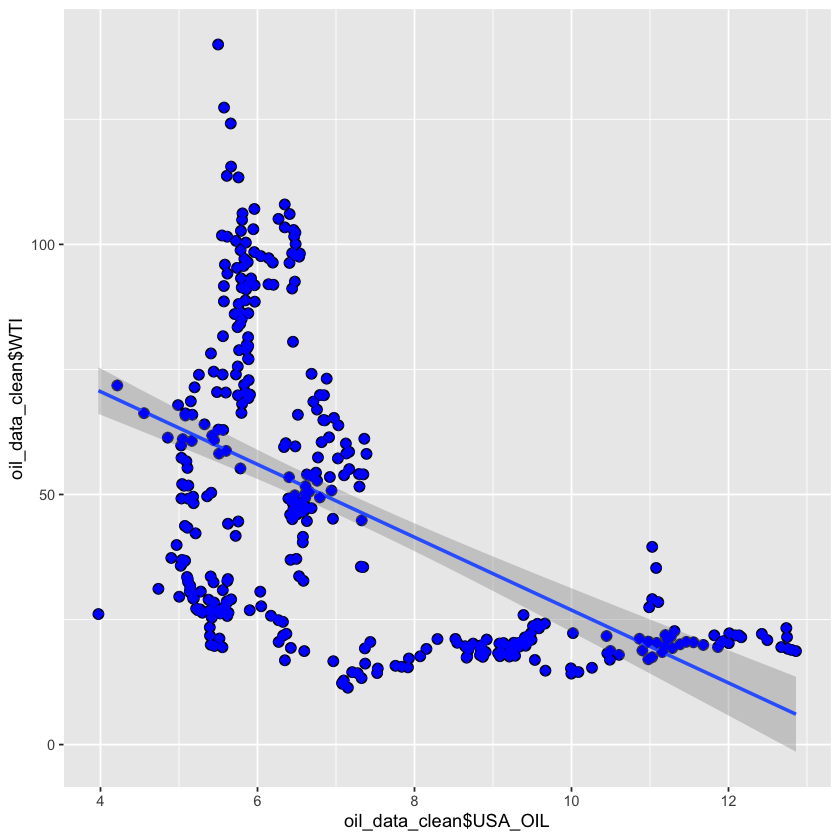

In [324]:
# plot Air Temperature Data across 2009-2011 using daily data
ggplot(oil_data_clean, aes(oil_data_clean$USA_OIL, oil_data_clean$WTI)) + stat_summary(fun.data= mean_cl_normal) + 
  geom_smooth(method='lm') +
           geom_point(na.rm=TRUE, color="blue", size=3, pch=18)